In [2]:
#import modules
import xarray as xr
import numpy as np
import pandas as pd
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [8]:
#Get data
pth= "/geos/d21/s1878599/EMISSIONS_WRF/anthro_data/EDGAR-HTAP_2010/MOZART_MOSAIC/ALL_2010/"
out_dir = pth + "no_double_pm/"

In [9]:
# Open files
pm10 = xr.open_dataset(pth + "EDGAR_HTAP_emi_PM10_2010.0.1x0.1.nc") 
bc = xr.open_dataset(pth + "EDGAR_HTAP_emi_BC_2010.0.1x0.1.nc")
oc = xr.open_dataset(pth + "EDGAR_HTAP_emi_OC_2010.0.1x0.1.nc")
pm25 = xr.open_dataset(pth + "EDGAR_HTAP_emi_PM2.5_2010.0.1x0.1.nc")

In [16]:
# CORRECT PM10
  
#substract pm25
pm10["emis_tot_corr"] = pm10.emis_tot - pm25.emis_tot

#Set possible negative values to zero.
#pm10.emis_tot_corr.values = pm10.emis_tot_corr.values.clip(min=0)   

# create new dataset to save
pm10new= pm10.drop("emis_tot")
pm10new=pm10new.rename({"emis_tot_corr":"emis_tot"})

# save to file
outpath = out_dir + "EDGAR_HTAP_emi_PM10_2010.0.1x0.1_new.nc" 
pm10new.to_netcdf(outpath,format = 'NETCDF3_64BIT')

In [17]:
# CORRECT PM2.5
  
#substract oc and bc
pm25["emis_tot_corr"] = pm25.emis_tot - oc.emis_tot - bc.emis_tot

#Set possible negative values to zero.
#pm25.emis_tot_corr.values = pm25.emis_tot_corr.values.clip(min=0.0)   

# create new dataset to save
pm25new= pm25.drop("emis_tot")
pm25new= pm25new.rename({"emis_tot_corr":"emis_tot"})

# save to file
outpath = out_dir + "EDGAR_HTAP_emi_PM2.5_2010.0.1x0.1_new.nc" 
pm25new.to_netcdf(outpath,format = 'NETCDF3_64BIT')

In [ ]:
#check max values corrected < default

In [12]:
pm10.emis_tot.values.max()

4.104924e-08

In [13]:
pm25.emis_tot.values.max()

3.1559033e-08

In [31]:
pm10corr = xr.open_dataset(out_dir + "EDGAR_HTAP_emi_PM10_2010.0.1x0.1_new.nc") 
pm25corr = xr.open_dataset(out_dir + "EDGAR_HTAP_emi_PM2.5_2010.0.1x0.1_new.nc")

In [24]:
pm10corr.emis_tot.values = pm10corr.emis_tot.values.clip(min=0.0)    #[0,:,:].plot.imshow()

In [32]:
pm10corr.emis_tot.values.max()

1.1017133e-08

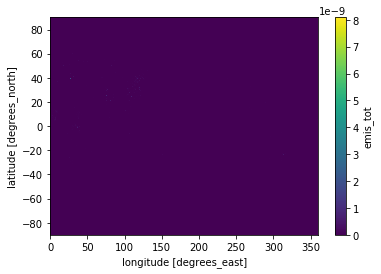

In [27]:
pm10corr.emis_tot[0,:,:].plot.imshow()

In [33]:
# check negative emissions and set to zero
import xarray as xr
import warnings
warnings.filterwarnings('ignore')
path1="/geos/d21/s1878599/IGP/inputs/autumn/base/wrfchemi_00z_d01"
path2="/geos/d21/s1878599/IGP/inputs/autumn/base/wrfchemi_12z_d01"
a1=xr.open_mfdataset(path1,concat_dim="Time")
a2=xr.open_mfdataset(path2,concat_dim="Time")

a1.E_PM_10.values = a1.E_PM_10.values.clip(min=0.0) 
a1.E_PM25I.values = a1.E_PM25I.values.clip(min=0.0)
a1.E_PM25J.values = a1.E_PM25J.values.clip(min=0.0)

a2.E_PM_10.values = a2.E_PM_10.values.clip(min=0.0) 
a2.E_PM25I.values = a2.E_PM25I.values.clip(min=0.0)
a2.E_PM25J.values = a2.E_PM25J.values.clip(min=0.0)

# save to file
a1.to_netcdf(path1 +"_corr",format = 'NETCDF3_64BIT')
a2.to_netcdf(path2+"_corr",format = 'NETCDF3_64BIT')

In [3]:
#CHECK
path3="/scratch/local/caterina/WRFChem3.9.1.1/WRF/run_autumn/emi_base/wrfchemi_12z_d01"
path4="/scratch/local/caterina/WRFChem3.9.1.1/WRF/run_autumn/emi_ptrb/wrfchemi_12z_d01"
a3=xr.open_mfdataset(path3,concat_dim="Time")
a4=xr.open_mfdataset(path4,concat_dim="Time")

In [6]:
a4.E_PM25I.values.min()

-6.374421e-10

In [8]:
a4.E_PM25I.values.max()

0.24027118

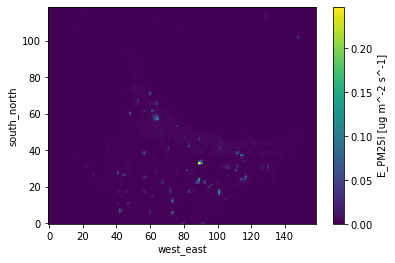

In [4]:
a4.E_PM25I[11,0,:,:].plot.imshow()